# News/Tweets Sentiment Analysis - Deep Learning problem 

The mission of this project is to use deep learning techniques to develop a machine learning model that assesses the sentiment of textual content related to a business. This sentiment analysis of news and tweets could potentially indicate future stock price trends for the business.

# Gather data, determine the method of data collection and provenance of the data (1 point)
The datasets used in the machine learning are full coming from Kaggle.  I will be importing all the datasets from the Kaggle input directory.   


### Installing and importing dependencies

In [2]:
!pip install beautifulsoup4
!pip install tweepy

     |████████████████████████████████| 147 kB 3.5 MB/s eta 0:00:01
     |████████████████████████████████| 98 kB 2.5 MB/s eta 0:00:011
     |████████████████████████████████| 151 kB 19.8 MB/s eta 0:00:01
     |████████████████████████████████| 62 kB 1.2 MB/s  eta 0:00:01
     |████████████████████████████████| 136 kB 58.5 MB/s eta 0:00:01
  Attempting uninstall: requests
    Found existing installation: requests 2.25.1
    Uninstalling requests-2.25.1:
      Successfully uninstalled requests-2.25.1
  Attempting uninstall: oauthlib
    Found existing installation: oauthlib 3.0.1
    Uninstalling oauthlib-3.0.1:
      Successfully uninstalled oauthlib-3.0.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
conda 4.9.2 requires ruamel_yaml>=0.11.14, which is not installed.
jupyterlab-git 0.11.0 requires nbdime<2.0.0,>=1.1.0, but you have nbdime 2.1.0 which is incom

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing
import os
import tweepy as tw #for accessing Twitter API
import pickle

#For Preprocessing
import re    # RegEx for removing non-letter characters
import nltk  #natural language processing
nltk.download("stopwords")
from nltk.corpus import stopwords
from nltk.stem.porter import *

# For Building the model
from sklearn.model_selection import train_test_split
import tensorflow as tf
import seaborn as sns

#For data visualization
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import plotly.express as px
%matplotlib inline

pd.options.plotting.backend = "plotly"

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


# Identify a Deep Learning Problem
This problem of assessing sentiment from text is well-suited to deep learning techniques. Given that the problem involves processing text sequences, a recurrent neural network (RNN) architecture is appropriate. I will experiment with different approaches, including simpleRNN and long short-term memory (LSTM), to train the machine learning model. Given the relatively short nature of the text input in the dataset, simpleRNN might be sufficient. However, I will also explore the more advanced LSTM approach, which can remember longer sequences, to see how these different methods compare in generating better results.

# Inspect, Visualize and Clean the Data

Determine if any data needs to be transformed. For example, if you're planning on using an SVM method for prediction, you may need to normalize or scale the data if there is a considerable difference in the range of the data.

Using your hypothesis, indicate if it's likely that you should transform data, such as using a log transform or other transformation of the dataset.

You should determine if your data has outliers or needs to be cleaned in any way. Are there missing data values for specific factors? How will you handle the data cleaning? Will you discard, interpolate or otherwise substitute data values?

If you believe that specific factors will be more important than others in your analysis, you should mention which and why. You will use this to confirm your intuitions in your final write-up.


Show a few visualizations like histograms. Describe any data cleaning procedures. Based on your EDA, what is your plan of analysis? 




## Datasets

The following section provides a detailed description of the data to be used for machine learning.

The original dataset, sourced from the Financial Phrase Bank, contains sentiment annotations for financial news headlines from the perspective of a retail investor. One reason why statistical techniques in financial sentiment analysis have low utilization is the lack of high-quality training data. The Financial Phrase Bank provides a rare collection of annotated financial news. This collection, consisting of approximately 5,000 news headlines, was annotated from an investor's viewpoint to determine whether the information might have a positive, negative, or neutral influence on stock prices.

To determine sentiment from other perspectives that could potentially impact businesses and, consequently, their stock performance, additional textual data with sentiment labels are aggregated with the Financial Phrase Bank's data. For example, datasets of tweets related to Apple and its products and services, as well as tweets about various airlines, are included. These aggregated datasets provide a broader view of sentiment on different aspects of the business, which could influence its stock price.

### Describe the factors or components that make up the dataset


This release of the financial phrase bank covers a collection of 4840 sentences. The selected collection of phrases was annotated by 16 people with adequate background knowledge on financial markets and the sentiment given is either "positive, neutral or negative".

Besides, Financial Phrase Bank's dataset, the following four different datasets will be aggragated to become a more diverse dataset with sentiment data.

- appletwittersentimenttexts
- twitter-airline-sentiment
- twitter-and-reddit-sentimental-analysis-dataset
- finalSentimentdata2




### Correlations between different factors of the dataset

All five datasets used in this project have various features (columns) providing different types of textual data. However, they all share a common structure in their CSV files, each containing two essential columns: one for the text data and one for sentiment assessment. Below is more detailed information about each dataset:
- Financial Phrase Bank News: This dataset collects financial news headlines and their sentiment assessments. It contains a CSV file with two columns: "headlines" and "sentiment."
- Apple Twitter Sentiment: This dataset contains tweets related to the company Apple, covering aspects such as its products, services, and support experiences. It contains a CSV file with two columns: "tweets" and "sentiment."
- Airline Twitter Sentiment: This dataset contains tweets about various airline companies, such as Virgin America. Its CSV file contains 15 columns, including "tweets," "sentiment," "airline name," "negative reason," "retweet count," and more.
- Reddit and Twitter Sentiment: This dataset includes tweets and discussions from Reddit and Twitter, covering a wide range of topics. There are two CSV files, each with two columns: "text" and "sentiment," storing data from Reddit and Twitter respectively.
- Twitter Data: This dataset contains general tweets, primarily from users in regions close to India. Its CSV file has two columns: "text" and "sentiment."

### Data Transform

The structure of these datasets is relatively simple. The major transformation needed is to extract the "text" and "sentiment" columns from each dataset and aggregate them into a combined dataset.

Since the sentiment column is encoded slightly differently across datasets—some using numeric representations like -1, 0, and 1, and others using textual representations like "positive," "neutral," and "negative"—one essential transformation process is to standardize the sentiment labels to a textual format with categories: "positive," "neutral," and "negative."

### Important factors for the analysis

The combined dataset comprises 187,174 sentences (one per row) along with their corresponding sentiments (positive, neutral, and negative).

These five datasets, though not directly related by a common topic, collectively showcase different aspects of user sentiment related to a business:
- Financial Phrase Bank News: Provides a direct assessment of potential immediate impacts on a business's stock price.
- Apple and Airline Twitter Sentiment: Reflects customer feelings about a company's products or services.
- Reddit and Twitter Sentiment: Offers a general sentiment assessment across a broad range of topics.
- Twitter Data from India: Helps uncover sentiment assessments from a specific cultural perspective.

By combining these datasets, we aim to capture a comprehensive view of sentiment that could potentially influence a business's stock price.

## Loading and prepping dataset

The datasets will be loaded from the Kaggle directory and aggregated into a single pandas DataFrame. 

In [3]:
# Load finanical news dataset
df1 = pd.read_csv('../input/sentiment-analysis-for-financial-news/all-data.csv',delimiter=',',encoding='latin-1')
df1 = df1.rename(columns={'neutral':'category','According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing .':'clean_text'})
df1['category'] = df1['category'].map({'negative': -1.0, 'neutral': 0.0, 'positive':1.0})
df1.head()

,category,clean_text
0,0.0,Technopolis plans to develop in stages an area...
1,-1.0,The international electronic industry company ...
2,1.0,With the new production plant the company woul...
3,1.0,According to the company 's updated strategy f...
4,1.0,FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...


In [4]:
# Load Tweet dataset
df2 = pd.read_csv('../input/appletwittersentimenttexts/apple-twitter-sentiment-texts.csv')
df2 = df2.rename(columns={'text': 'clean_text', 'sentiment':'category'})
df2['category'] = df2['category'].map({-1: -1.0, 0: 0.0, 1:1.0})
df2.head()

,clean_text,category
0,Wow. Yall needa step it up @Apple RT @heynyla:...,-1.0
1,What Happened To Apple Inc? http://t.co/FJEX...,0.0
2,Thank u @apple I can now compile all of the pi...,1.0
3,The oddly uplifting story of the Apple co-foun...,0.0
4,@apple can i exchange my iphone for a differen...,0.0


In [5]:
# Load Tweet dataset
df3 = pd.read_csv('../input/twitterdata/finalSentimentdata2.csv')
df3 = df3.rename(columns={'text': 'clean_text', 'sentiment':'category'})
df3['category'] = df3['category'].map({'sad': -1.0, 'anger': -1.0, 'fear': -1.0, 'joy':1.0})
df3 = df3.drop(['Unnamed: 0'], axis=1)
df3.head()

,category,clean_text
0,-1.0,agree the poor in india are treated badly thei...
1,1.0,if only i could have spent the with this cutie...
2,1.0,will nature conservation remain a priority in ...
3,-1.0,coronavirus disappearing in italy show this to...
4,-1.0,uk records lowest daily virus death toll since...


In [6]:
# Load Tweet dataset
df4 = pd.read_csv('../input/twitter-airline-sentiment/Tweets.csv')
df4 = df4.rename(columns={'text': 'clean_text', 'airline_sentiment':'category'})
df4['category'] = df4['category'].map({'negative': -1.0, 'neutral': 0.0, 'positive':1.0})
df4 = df4[['category','clean_text']]
# Output first five rows
df4.head()

,category,clean_text
0,0.0,@VirginAmerica What @dhepburn said.
1,1.0,@VirginAmerica plus you've added commercials t...
2,0.0,@VirginAmerica I didn't today... Must mean I n...
3,-1.0,@VirginAmerica it's really aggressive to blast...
4,-1.0,@VirginAmerica and it's a really big bad thing...


In [7]:
# Load Tweet dataset
df5 = pd.read_csv('../input/twitter-and-reddit-sentimental-analysis-dataset/Twitter_Data.csv')
# Output first five rows
df5.head()

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


In [8]:
# aggregating all the datasets
df = pd.concat([df1, df2, df3, df4, df5], ignore_index=True)  #added df5

## Cleaning and adjusting data

To cleanse the "text" column as described, here's how you can process it in Python using pandas and basic string operations:
- Drop NaN and None records: Remove rows where the "text" column is NaN or None.
- Remove HTML tags and syntax: Clean the text by removing HTML tags and any unnecessary syntax.
- Convert text to string: Ensure all entries in the "text" column are converted to strings.
- Encode sentiment value: Convert the sentiment labels to numeric encoding if needed.

In [9]:
from bs4 import BeautifulSoup
def cleanText(text):
    if text is None or pd.isna(text):
        text = ''
    else:
        text = str(text)  # Convert to string if not already        
    text = BeautifulSoup(text, "lxml").text
    text = re.sub(r'\|\|\|', r' ', text) 
    text = re.sub(r'http\S+', r'<URL>', text)
    #text = text.lower()
    #text = text.replace('x', '')
    #text = text.fillna('').astype(str)
    return text

df.isnull().sum()
df.dropna(axis=0, inplace=True)
df.fillna('', inplace=True)
df['clean_text'] = df['clean_text'].apply(cleanText)#.astype(str)
# Map tweet categories
df['category'] = df['category'].map({-1.0:'Negative', 0.0:'Neutral', 1.0:'Positive'})
# dimensionality of the data
print(df.shape)

########################
# SAVE df to disk
#######################
df.to_csv('my_sentimentdata.csv', index=False)
df.head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  import sys


(187174, 2)


,category,clean_text
0,Neutral,Technopolis plans to develop in stages an area...
1,Negative,The international electronic industry company ...
2,Positive,With the new production plant the company woul...
3,Positive,According to the company 's updated strategy f...
4,Positive,FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...


In [11]:
########################
# LOAD df from disk
#######################
#df.to_csv('my_sentimentdata.csv', index=False)
#df = pd.read_csv('my_sentimentdata.csv')
df = pd.read_csv('my_sentimentdata.csv', dtype={'clean_text': str})
df['clean_text'] = df['clean_text'].astype(str)  # this works

# Exploratory Data Analysis

The chart below illustrates the distribution of sentiment labels in the dataset. It shows a balanced distribution across sentiments: approximately 76,000 tweets with positive sentiment, 62,000 with neutral sentiment, and 48,000 with negative sentiment. This breaks down to about 41% positive, 33% neutral, and 26% negative sentiments respectively.

In total, the dataset contains 187,174 rows of text data.

Total number of tweet is 187174


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


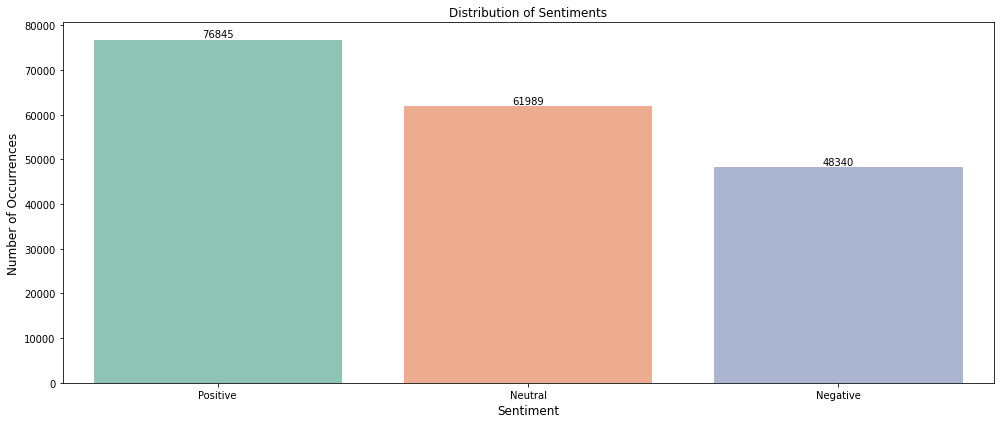

In [13]:
# total number of tweets
print(f"Total number of tweet is {df.shape[0]}")

# Calculate sentiment breakdown
sentimentbreakdown = df['category'].value_counts()

# Set color palette for consistency
colors = sns.color_palette('Set2')

# Create a figure with subplots for bar plot and pie chart
fig, ax1 = plt.subplots(1, 1, figsize=(14, 6))

# Bar plot
sns.barplot(sentimentbreakdown.index, sentimentbreakdown.values, alpha=0.8, ax=ax1, palette=colors)
ax1.set_ylabel('Number of Occurrences', fontsize=12)
ax1.set_xlabel('Sentiment', fontsize=12)
ax1.set_title('Distribution of Sentiments')

# Add count values on each bar
for index, value in enumerate(sentimentbreakdown.values):
    ax1.text(index, value, str(value), ha='center', va='bottom')

# Pie chart
pie_data = df['category'].value_counts(normalize=True).reset_index()
pie_data.columns = ['category', 'percentage']
fig2 = px.pie(pie_data, values='percentage', names='category', title='Pie Chart of Sentiment Distribution', 
              color_discrete_sequence=px.colors.qualitative.Set2)

# Adjust pie chart properties
fig2.update_traces(textposition='inside', textinfo='percent+label')

# Show plots
plt.tight_layout()
plt.show()
fig2.show()


The box plot below displays the distribution of the number of words in the content (tweets). On average, tweets contain around 20 words. Instances with more than approximately 50 words are considered outliers. Setting a maximum input length of 50 words for the training data may be appropriate.

object


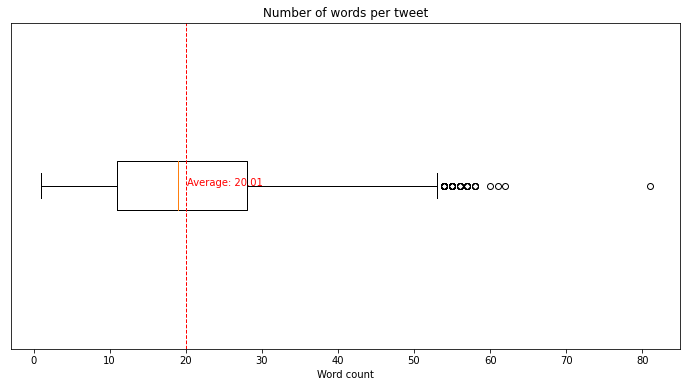

In [14]:
# Check the data type of the 'clean_text' column
print(df['clean_text'].dtypes)

# If the column contains text data, proceed with the calculation
if df['clean_text'].dtype == 'object':
    # Calculate tweet lengths
    tweet_len = pd.Series([len(str(tweet).split()) for tweet in df['clean_text']])

    # Creating the box plot
    plt.figure(figsize=(12, 6))
    plt.boxplot(tweet_len, vert=False)
    avg_word_count = tweet_len.mean()
    plt.axvline(x=avg_word_count, color='r', linestyle='--', linewidth=1)
    plt.text(avg_word_count + 0.1, 1, f'Average: {avg_word_count:.2f}', color='r')
    plt.title('Number of words per tweet')
    plt.xlabel('Word count')
    plt.yticks([])  # Disable y ticks
    plt.show()
else:
    print("The 'clean_text' column does not contain text data.")


The plot below shows the distribution of text lengths for tweets with positive sentiment. The distribution appears to be bimodal, indicating two distinct peaks. This suggests that there are two main clusters or groups within the positive sentiment tweets. One cluster centers around shorter tweets, while the other is characterized by longer tweets. Exploring these two different behaviors further could be valuable to assess their impact on the machine learning model.

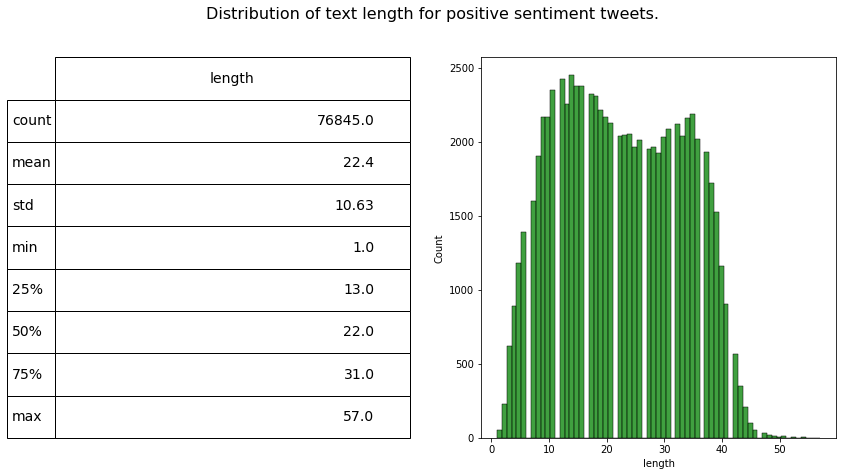

In [15]:
fig = plt.figure(figsize=(14,7))
#df['length'] = df.clean_text.str.split().apply(len)
df['length'] = df['clean_text'].astype(str).str.split().apply(len)
ax1 = fig.add_subplot(122)  # 1 row, 2 col, second chart
sns.histplot(df[df['category']=='Positive']['length'], ax=ax1,color='green')
describe = df.length[df.category=='Positive'].describe().to_frame().round(2)

ax2 = fig.add_subplot(121)
ax2.axis('off')
font_size = 14
bbox = [0, 0, 1, 1]
table = ax2.table(cellText = describe.values, rowLabels = describe.index, bbox=bbox, colLabels=describe.columns)
table.set_fontsize(font_size)
fig.suptitle('Distribution of text length for positive sentiment tweets.', fontsize=16)

plt.show()

The plot below illustrates the distribution of text lengths for tweets with negative sentiment. While not as pronounced as in positive sentiment tweets, there appears to be a bimodal pattern. This suggests the presence of two distinct groups or clusters within the negative sentiment tweets. Further investigation into these behavioral patterns could provide insights into their potential impact on the machine learning model.

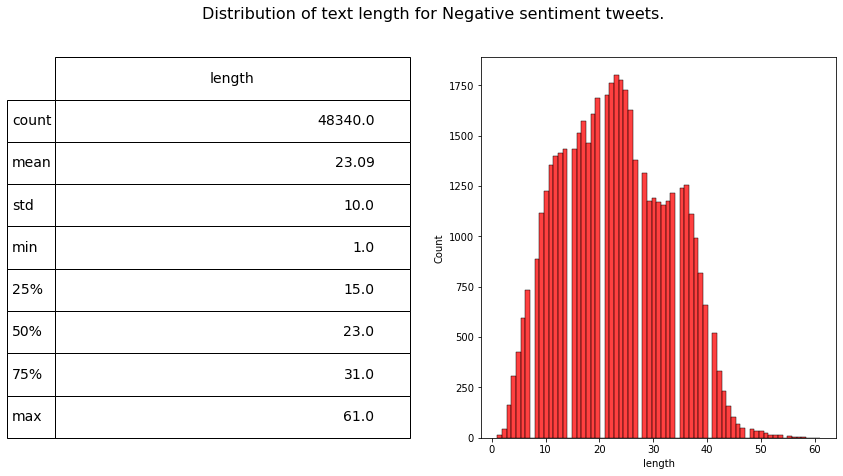

In [17]:
fig = plt.figure(figsize=(14,7))
#df['length'] = df.clean_text.str.split().apply(len)
df['length'] = df['clean_text'].astype(str).str.split().apply(len)

ax1 = fig.add_subplot(122)
sns.histplot(df[df['category']=='Negative']['length'], ax=ax1,color='red')
describe = df.length[df.category=='Negative'].describe().to_frame().round(2)

ax2 = fig.add_subplot(121)
ax2.axis('off')
font_size = 14
bbox = [0, 0, 1, 1]
table = ax2.table(cellText = describe.values, rowLabels = describe.index, bbox=bbox, colLabels=describe.columns)
table.set_fontsize(font_size)
fig.suptitle('Distribution of text length for Negative sentiment tweets.', fontsize=16)

plt.show()

In [18]:
# cleanup
df.drop(['length'], axis=1, inplace=True)

<bound method NDFrame.head of         category                                         clean_text
0        Neutral  Technopolis plans to develop in stages an area...
1       Negative  The international electronic industry company ...
2       Positive  With the new production plant the company woul...
3       Positive  According to the company 's updated strategy f...
4       Positive  FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...
...          ...                                                ...
187169  Negative  why these 456 crores paid neerav modi not reco...
187170  Negative  dear rss terrorist payal gawar what about modi...
187171   Neutral  did you cover her interaction forum where she ...
187172   Neutral  there big project came into india modi dream p...
187173  Positive  have you ever listen about like gurukul where ...

[187174 rows x 2 columns]>

The word cloud below displays the relative frequency of the most common words in the tweet corpus. Notably, words like "Modi" and "India" appear frequently across all three sentiment categories. This suggests that some datasets may originate from sources with a significant number of users from India. This raises a concern that the sentiment captured in the data may be influenced by the cultural perspective of these users. If this specific cultural context does not reflect the sentiment perceived by the average person, it could introduce bias into the model trained on this data.

Further analysis is recommended to assess the dominance of tweets originating from India compared to other regions. Adjustments to balance the dataset may be necessary to mitigate potential cultural biases in the model.

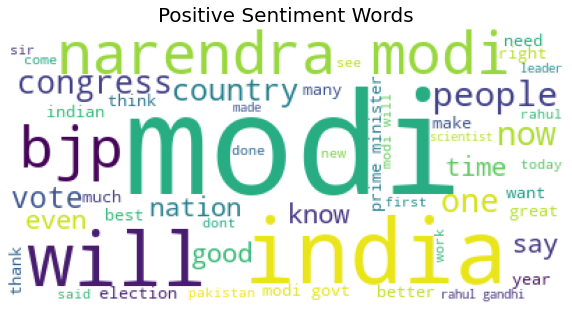

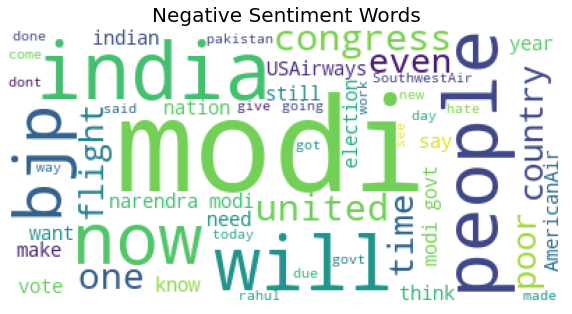

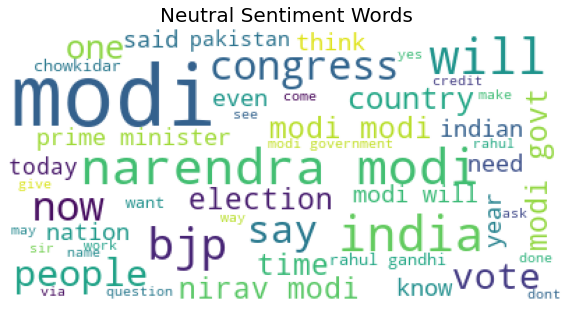

In [19]:
#### Visualizing data into wordclouds

from wordcloud import WordCloud, STOPWORDS

def wordcount_gen(df, category):
    
    # Combine all tweets
    combined_tweets = " ".join([tweet for tweet in df[df.category==category]['clean_text']])
                          
    # Initialize wordcloud object
    wc = WordCloud(background_color='white', 
                   max_words=50, 
                   stopwords = STOPWORDS)

    # Generate and plot wordcloud
    plt.figure(figsize=(10,10))
    plt.imshow(wc.generate(combined_tweets))
    plt.title('{} Sentiment Words'.format(category), fontsize=20)
    plt.axis('off')
    plt.show()
    
# Positive tweet words
wordcount_gen(df, 'Positive')
     
# Negative tweet words
wordcount_gen(df, 'Negative')
     
# Neutral tweet words
wordcount_gen(df, 'Neutral')
     


## Data Preprocessing

The following process converts tweets into a sequence of words represented as a list.

In [20]:
# Convert tweet text into a sequence of words
def tweet_to_words(tweet):
    text = tweet.lower()
    # remove non letters
    text = re.sub(r"[^a-zA-Z0-9]", " ", text)
    # tokenize
    words = text.split()
    # remove stopwords
    words = [w for w in words if w not in stopwords.words("english")]
    # apply stemming
    words = [PorterStemmer().stem(w) for w in words]
    # return list
    return words

print("\nOriginal tweet ->", df['clean_text'][0])
print("\nProcessed tweet ->", tweet_to_words(df['clean_text'][0]))
# Apply data processing to each tweet and 
X = list(map(tweet_to_words, df['clean_text']))

###################
# Save X to a file
with open('processed_tweets.pkl', 'wb') as file:
    pickle.dump(X, file)


Original tweet -> Technopolis plans to develop in stages an area of no less than 100,000 square meters in order to host companies working in computer technologies and telecommunications , the statement said .

Processed tweet -> ['technopoli', 'plan', 'develop', 'stage', 'area', 'less', '100', '000', 'squar', 'meter', 'order', 'host', 'compani', 'work', 'comput', 'technolog', 'telecommun', 'statement', 'said']


KeyboardInterrupt: 

In [4]:
#####################
# To load df and X back
#df.to_csv('my_sentimentdata.csv', index=False)

# load dataset as a df
df = pd.read_csv('my_sentimentdata.csv')
df['clean_text'] = df['clean_text'].astype(str)  # this works

# load tweet word as a list
with open('processed_tweets.pkl', 'rb') as file:
    X = pickle.load(file)    

### To prepare the data for training, the following code will encode the labels from text to numeric representation:

- Negative is encoded as 0
- Neutral is encoded as 1
- Positive is encoded as 2

In [5]:
from sklearn.preprocessing import LabelEncoder

# Encode target labels
le = LabelEncoder()
Y = le.fit_transform(df['category'])

# Print the numerical labels assigned to each original category
for label, category in zip(le.transform(le.classes_), le.classes_):
    print(f"{category} is encoded as {label}")
    
print(f"Total number of tweet is {len(Y)}")

Negative is encoded as 0
Neutral is encoded as 1
Positive is encoded as 2
Total number of tweet is 187174


### Tokenizing & Padding
Tokenization and padding are crucial steps in preparing text data for NLP and RNN modeling. Tokenization converts text into numerical integers, essential for machine learning models. Padding ensures that all tokenized sequences are of the same length, which is necessary for consistent input during model training.

Initially, the maximum number of words in the token vocabulary is set to 5000. A higher maximum could potentially improve model performance, but it would also increase the computational requirements. This setting will be reviewed to determine if a higher number of words is necessary.

Additionally, the maximum length of input text is set to 50. This length is sufficient because very few tweets in the dataset exceed 50 words, and those that do are considered outliers.

In [12]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

max_words = 5000
max_len=50

def tokenize_pad_sequences(text):
    '''
    This function tokenize the input text into sequnences of intergers and then
    pad each sequence to the same length
    '''
    # Text tokenization
    tokenizer = Tokenizer(num_words=max_words, lower=True, split=' ')
    tokenizer.fit_on_texts(text)
    # Transforms text to a sequence of integers
    X = tokenizer.texts_to_sequences(text)
    # Pad sequences to the same length
    X = pad_sequences(X, padding='post', maxlen=max_len)
    # return sequences
    return X, tokenizer

print('Before Tokenization & Padding \n', df['clean_text'][0])
X, tokenizer = tokenize_pad_sequences(df['clean_text'])
print('After Tokenization & Padding \n', X[0])

##############
# saving
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

Before Tokenization & Padding 
 Technopolis plans to develop in stages an area of no less than 100,000 square meters in order to host companies working in computer technologies and telecommunications , the statement said .
After Tokenization & Padding 
 [1399   26 1539   63  335 1402   58  277  594   77  445 1555 4103   63
  717   26 1405  355   63 3004    3    2  582   81    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0]


In [13]:
####################
# loading tokenized data
with open('tokenizer.pickle', 'rb') as handle:
    tokenizer = pickle.load(handle)

### Spliting data into training, validation and test dataset 

From the total of 187174 rows of tweets, they will be split into three different sets. Initially, 80% of the tweets will be randomly selected as the training set for modeling, and the remaining 20% will be allocated to the test set. From the training set, an additional 25% of the tweets will be randomly chosen to form the validation set. Below is the breakdown of the sizes for each dataset:
- Train Set -> 112304 tweets
- Validation Set -> 37435 tweets
- Test Set -> 37435 tweets


In [14]:
y = pd.get_dummies(df['category'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)
print('Train Set ->', len(X_train), len(y_train))
print('Validation Set ->', len(X_val), len(y_val))
print('Test Set ->', len(X_test), len(y_test))

Train Set -> 112304 112304
Validation Set -> 37435 37435
Test Set -> 37435 37435


# Model Architecture

I will employ deep learning and Recurrent Neural Network (RNN) architecture to construct a machine learning model for this problem. RNNs are particularly effective for modeling sequence data like tweet text.

I'll explore a range of architectures, starting from simpler models and progressively iterating to improve performance. The RNN model will incorporate various layers including Embedding, Convolution1D, Maxpooling, LSTM, Dropout, and Dense layers. Different combinations of these layers along with tuning hyperparameters will be explored to optimize the model and achieve the best performance for sentiment prediction.

## Building version 1 basic simple RNN

The first version of the RNN model will be a basic configuration aimed at establishing a workflow and setting a performance baseline for more advanced models.

This initial RNN will include:
- An Embedding layer, which transforms categorical data into a continuous vector space.
- A SimpleRNN layer, which processes sequential data by passing a hidden state along with the input at each time step.
- A Dense layer, which is fully connected and commonly used in feedforward neural networks.

The model will be trained for 10 epochs to evaluate its performance with this architecture.


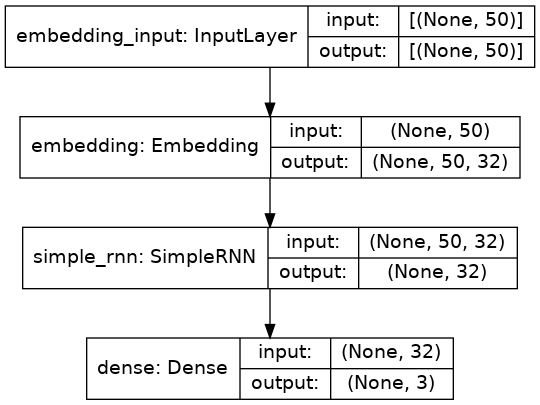

In [16]:
from keras.models import Sequential
from keras.models import Model
from keras.layers import Input, Embedding, SimpleRNN, Conv1D, MaxPooling1D, Bidirectional, LSTM, Dense, Dropout
from keras.metrics import Precision, Recall
from keras.optimizers import SGD
from keras.optimizers import RMSprop
from keras import datasets

from keras.callbacks import LearningRateScheduler
from keras.callbacks import History
from keras import losses
import tensorflow as tf

vocab_size = 5000
embedding_size = 32
max_len = 50  # majority of tweets have less than 50 words
epochs = 10
learning_rate = 0.1
decay_rate = learning_rate / epochs
momentum = 0.8

sgd = SGD(learning_rate=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)

# Build model
model = Sequential()
# Embedding layer
model.add(Embedding(vocab_size, embedding_size, input_length=max_len))
#model.add(MaxPooling1D(pool_size=2))  ############## this makes a difference!!!!!!!!!!!!!
model.add(SimpleRNN(32, return_sequences=False))
# Dense layer
model.add(Dense(3, activation='softmax'))

# Compile the model
model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy', Precision(), Recall()])

# Show model 
tf.keras.utils.plot_model(model, show_shapes=True)

In [17]:
print(model.summary())
# Compile model
model.compile(loss='categorical_crossentropy', optimizer=sgd, 
               metrics=['accuracy', Precision(), Recall()])
# Train model
batch_size = 64
history1 = model.fit(X_train, y_train,
                      validation_data=(X_val, y_val),
                      batch_size=batch_size, epochs=epochs, verbose=1)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 50, 32)            160000    
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 32)                2080      
_________________________________________________________________
dense (Dense)                (None, 3)                 99        
Total params: 162,179
Trainable params: 162,179
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
1755/1755 [==============================] - 55s 30ms/step - loss: 1.0867 - accuracy: 0.4016 - precision_1: 0.3791 - recall_1: 0.0070 - val_loss: 1.0638 - val_accuracy: 0.4340 - val_precision_1: 0.5707 - val_recall_1: 0.0421
Epoch 2/10
1755/1755 [==============================] - 54s 31ms/step - loss: 1.0811 - accuracy: 0.4126 - precision_1: 0.4403 - recall_1: 7

## Results and Analysis

The primary layer in this initial version is the SimpleRNN layer, typically effective for basic sequence data. Despite its limitation in recalling distant data points, our tweet dataset consists mostly of short sequences (limited words), suggesting SimpleRNN could perform adequately.

Unexpectedly, the results were disappointing. The model's first version exhibited poor performance: the training dataset accuracy showed minimal improvement throughout all epochs, plateauing at approximately 40%. Validation accuracy also stagnated around 40%, showing no signs of improvement. Both training and validation losses remained high and exhibited instability.

This could indicate that the SimpleRNN layer struggles to effectively process the text in our datasets. SimpleRNN often faces challenges with long-term dependencies due to the vanishing gradient problem, which might contribute to the lack of improvement in accuracy and loss. Additionally, the RNN architecture may be lacking regularization layers, and the learning rate could possibly be too high.

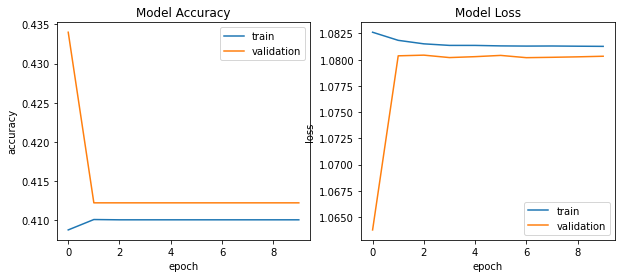

In [18]:
### Function to plot history for accuracy and loss
def plot_training_hist(history):
    fig, ax = plt.subplots(1, 2, figsize=(10,4))
    # first plot
    ax[0].plot(history.history['accuracy'])
    ax[0].plot(history.history['val_accuracy'])
    ax[0].set_title('Model Accuracy')
    ax[0].set_xlabel('epoch')
    ax[0].set_ylabel('accuracy')
    ax[0].legend(['train', 'validation'], loc='best')
    # second plot
    ax[1].plot(history.history['loss'])
    ax[1].plot(history.history['val_loss'])
    ax[1].set_title('Model Loss')
    ax[1].set_xlabel('epoch')
    ax[1].set_ylabel('loss')
    ax[1].legend(['train', 'validation'], loc='best')
    
plot_training_hist(history1)

In [19]:
#Function to calculate f1 score
import keras.backend as K

def f1_score(precision, recall):
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

# Evaluate model on the test set
loss, accuracy, precision, recall = model.evaluate(X_test, y_test, verbose=0)
# Print metrics
print('Performance of version 1 model')
print('Accuracy  : {:.4f}'.format(accuracy))
print('Precision : {:.4f}'.format(precision))
print('Recall    : {:.4f}'.format(recall))
print('F1 Score  : {:.4f}'.format(f1_score(precision, recall)))

Performance of version 1 model
Accuracy  : 0.4104
Precision : 0.0000
Recall    : 0.0000
F1 Score  : 0.0000


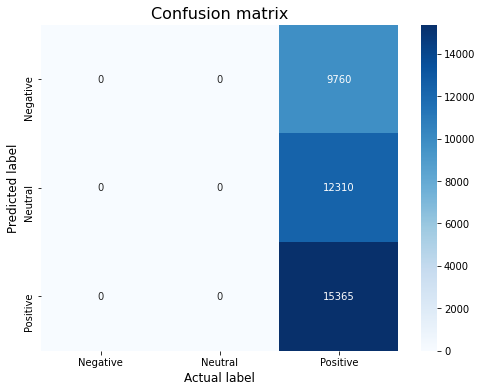

In [20]:
from sklearn.metrics import confusion_matrix
## Function to plot confusion matrix for the passed model and the data
def plot_confusion_matrix(model, X_test, y_test):
    
    sentiment_classes = ['Negative', 'Neutral', 'Positive']
    y_pred = model.predict(X_test)
    cm = confusion_matrix(np.argmax(np.array(y_test),axis=1), np.argmax(y_pred, axis=1))
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, cmap=plt.cm.Blues, annot=True, fmt='d', xticklabels=sentiment_classes, yticklabels=sentiment_classes)
    plt.title('Confusion matrix', fontsize=16)
    plt.xlabel('Actual label', fontsize=12)
    plt.ylabel('Predicted label', fontsize=12)
    
plot_confusion_matrix(model, X_test, y_test)

In [21]:
# Save the model architecture & the weights
#model.save('best_model0.h5') #original
model.save('version1.h5') #my
print('Version 1 saved')

Version 1 saved


## Building version 2 

The main addition to model verion 2 is to add maxpooling layers after the embedding layers.  Maxpooling could potential help extract important features from the data so that the RNN layer can focus on the most important critical aspects of the input sequences, potentially improving their ability to learn and generalize. 

Max pooling does not directly address the gradients' size during backpropagation. However, by reducing the spatial size of the input and emphasizing important features, it can help simplify the learning process and make the optimization landscape smoother. This can indirectly make the gradients more stable.

I have doubled the number of epochs to 20 to give the model more time to learn from the data.

In [22]:
vocab_size = 5000
embedding_size = 32
max_len = 50  # majority of tweets have less than 50 words
epochs = 20
learning_rate = 0.1
decay_rate = learning_rate / epochs
momentum = 0.8

sgd = SGD(learning_rate=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)
# Build model
model = Sequential()
model.add(Embedding(vocab_size, embedding_size, input_length=max_len))
model.add(MaxPooling1D(pool_size=2))  # version 2 addition
model.add(SimpleRNN(32, return_sequences=False))
model.add(Dense(3, activation='softmax'))
# Compile the model
model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy', Precision(), Recall()])
# Show model 
tf.keras.utils.plot_model(model, show_shapes=True)
print(model.summary())
# Compile model
model.compile(loss='categorical_crossentropy', optimizer=sgd, 
               metrics=['accuracy', Precision(), Recall()])
# Train model
batch_size = 64
history2 = model.fit(X_train, y_train,
                      validation_data=(X_val, y_val),
                      batch_size=batch_size, epochs=epochs, verbose=1)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 50, 32)            160000    
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 25, 32)            0         
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 32)                2080      
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 99        
Total params: 162,179
Trainable params: 162,179
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/20
1755/1755 [==============================] - 34s 18ms/step - loss: 1.0708 - accuracy: 0.4236 - precision_3: 0.4834 - recall_3: 0.1060 - val_loss: 1.0117 - val_accuracy: 0.4932 - val_precision_3: 0.6014 - val_recall_3: 0.1296
Epoch

## Results and Analysis

The verion 2 model has dramatic improvement over version 1 after 20 epochs.  Although both train and validation's accruaracy rate are not particular good, they are indeed improving as they get more epochs.  The validation accruarcy reaches 0.61 while training accruracy is close to 0.65.   Train accruracy seems to continue to improve, but validation seems to be flat. 

It seems that I won't get much more validation improvement even if I increase more epoch.  The model probably needs more complex acrchitecture to learn from the data.  Therefore, for the next version, I will replace the SimpleRNN with LSTM layers to see if I can improve the model performance. 

Upon examining the confusion matrix, it is evident that the model struggles to correctly predict negative sentiment content. This difficulty may stem from the relatively small amount of negative sentiment data available for training.

Performance of version 1 model
Accuracy  : 0.6070
Precision : 0.6631
Recall    : 0.4957
F1 Score  : 0.5673
Version 2 saved


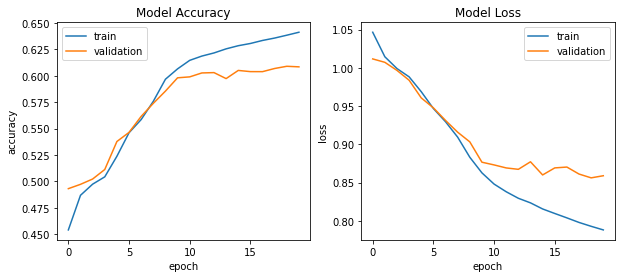

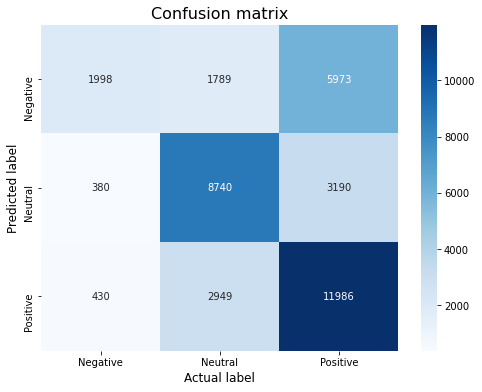

In [23]:
#plot training performance over epochs
plot_training_hist(history2)

# Evaluate model on the test set
loss, accuracy, precision, recall = model.evaluate(X_test, y_test, verbose=0)
# Print metrics
print('Performance of version 1 model')
print('Accuracy  : {:.4f}'.format(accuracy))
print('Precision : {:.4f}'.format(precision))
print('Recall    : {:.4f}'.format(recall))
print('F1 Score  : {:.4f}'.format(f1_score(precision, recall)))

#plot confusion matrix
plot_confusion_matrix(model, X_test, y_test)

# Save the model architecture & the weights
#model.save('best_model0.h5') #original
model.save('version2.h5') #my
print('Version 2 saved')

## Build version 3: 

The highlight of the version 3 model is the inclusion of an LSTM layer in the RNN architecture. Based on the performance of the previous version, it appears that the SimpleRNN layer has reached its limit with this dataset. Therefore, I simply replaced the SimpleRNN layer with a non-bidirectional LSTM layer. This allows us to directly observe the impact of LSTM on the model, as no other changes were made beyond this replacement.

LSTMs are designed to capture long-term dependencies in the data due to their special gating mechanisms (input gate, forget gate, and output gate). These gates help LSTMs maintain information over long sequences and selectively forget irrelevant information. Additionally, LSTMs have more trainable parameters compared to SimpleRNN, which should enhance the model's ability to make better sentiment predictions.

In [24]:
vocab_size = 5000
embedding_size = 32
epochs=20
learning_rate = 0.1
decay_rate = learning_rate / epochs
momentum = 0.8

sgd = SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)
# Build model
model= Sequential()
model.add(Embedding(vocab_size, embedding_size, input_length=max_len))
model.add(LSTM(32,return_sequences=False))
model.add(Dense(3,activation="softmax"))
model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy', Precision(), Recall()])
# Show model 
tf.keras.utils.plot_model(model, show_shapes=True)
print(model.summary())
# Compile model
model.compile(loss='categorical_crossentropy', optimizer=sgd, 
               metrics=['accuracy', Precision(), Recall()])
# Train model
batch_size = 64
history3 = model.fit(X_train, y_train,
                      validation_data=(X_val, y_val),
                      batch_size=batch_size, epochs=epochs, verbose=1)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 50, 32)            160000    
_________________________________________________________________
lstm (LSTM)                  (None, 32)                8320      
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 99        
Total params: 168,419
Trainable params: 168,419
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/20
1755/1755 [==============================] - 15s 8ms/step - loss: 1.0647 - accuracy: 0.4265 - precision_5: 0.3618 - recall_5: 0.0706 - val_loss: 1.0098 - val_accuracy: 0.4957 - val_precision_5: 0.5508 - val_recall_5: 0.2935
Epoch 2/20
1755/1755 [==============================] - 12s 7ms/step - loss: 1.0041 - accuracy: 0.4964 - precision_5: 0.5732 - recall_5: 0

## Results and Analysis

As expected, model version 3 shows significant improvement over the previous version. The single non-bidirectional LSTM layer enhances both training and validation accuracies, reaching up to 83.77% by the 20th epoch. Both training and validation accuracies improve consistently, with minimal discrepancy between them. This indicates that the model's predictions generalize well to unseen data, and there is no evident overfitting.

Moreover, the confusion matrix also demonstrates improvement, particularly in the accuracy of negative sentiment predictions compared to model version 2.

For version 4, the plan is to increase the complexity of the architecture by incorporating more advanced layers. While non-bidirectional LSTMs have produced significant results by allowing the model to capture long-term information flow in one direction, the logical next step is to explore bidirectional LSTMs in version 4. Bidirectional LSTMs enable the model to learn from information flowing in both directions, potentially capturing richer contextual dependencies. Additionally, layers such as Conv1D and Dropout will be added to further enrich the architecture.

Performance of version 1 model
Accuracy  : 0.8377
Precision : 0.8459
Recall    : 0.8279
F1 Score  : 0.8368
Version 3 saved


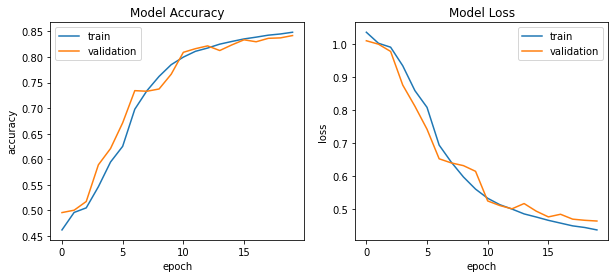

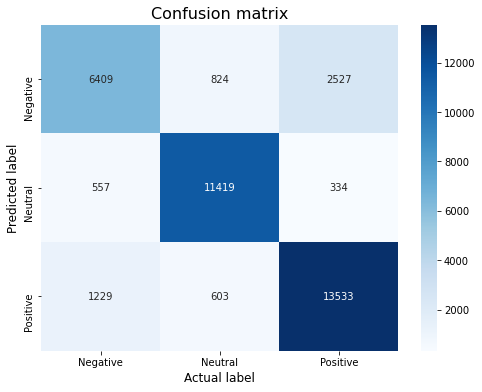

In [25]:
#plot training performance over epochs
plot_training_hist(history3)

# Evaluate model on the test set
loss, accuracy, precision, recall = model.evaluate(X_test, y_test, verbose=0)
# Print metrics
print('Performance of version 1 model')
print('Accuracy  : {:.4f}'.format(accuracy))
print('Precision : {:.4f}'.format(precision))
print('Recall    : {:.4f}'.format(recall))
print('F1 Score  : {:.4f}'.format(f1_score(precision, recall)))

#plot confusion matrix
plot_confusion_matrix(model, X_test, y_test)

# Save the model architecture & the weights
#model.save('best_model0.h5') #original
model.save('version3.h5') #my
print('Version 3 saved')

## Building version 4:

My final attempt involves trying a bidirectional LSTM along with other layers to increase regularization in the model. The bidirectional LSTM helps the model learn information both before and after the current input data, providing a more comprehensive understanding of the sequence.

In addition to the bidirectional LSTM layer, I will add a one-dimensional convolution layer (Conv1D) and a max pooling layer before it. The Conv1D layer, effective for sequential data, captures local patterns and reduces noise in the input data. Together with max pooling, the Conv1D layer also reduces feature dimensionality and enhances the representation of the input sequence. To further minimize overfitting, a dropout layer will be added after the bidirectional LSTM.

Here is a summary of the layers used in this version:

- Conv1D layer to capture local patterns and reduce noise.
- MaxPooling layer to reduce feature dimensionality.
- Bidirectional LSTM layer to capture information from both directions.
- Dropout layer to reduce overfitting.

By incorporating these layers, we aim to create a more robust model that can better predict sentiment from the text data.

In [26]:
vocab_size = 5000
embedding_size = 32
epochs=20
learning_rate = 0.1
decay_rate = learning_rate / epochs
momentum = 0.8

sgd = SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)
# Build model
model= Sequential()
model.add(Embedding(vocab_size, embedding_size, input_length=max_len))
model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Bidirectional(LSTM(32)))
model.add(Dropout(0.4))
model.add(Dense(3, activation='softmax'))
# Compile the model
model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy', Precision(), Recall()])
# Show model 
tf.keras.utils.plot_model(model, show_shapes=True)
print(model.summary())
# Compile model
model.compile(loss='categorical_crossentropy', optimizer=sgd, 
               metrics=['accuracy', Precision(), Recall()])
# Train model
batch_size = 64
history4 = model.fit(X_train, y_train,
                      validation_data=(X_val, y_val),
                      batch_size=batch_size, epochs=epochs, verbose=1)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 50, 32)            160000    
_________________________________________________________________
conv1d (Conv1D)              (None, 50, 32)            3104      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 25, 32)            0         
_________________________________________________________________
bidirectional (Bidirectional (None, 64)                16640     
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 195       
Total params: 179,939
Trainable params: 179,939
Non-trainable params: 0
________________________________________________

# Results and Analysis

The final results of the version 4 model are very promising. The overall validation accuracy reaches 90%. Both the training and validation learning curves appear smooth with minimal gap between them, indicating that overfitting is not an issue. Additionally, the learning curves flatten out after about 10 epochs, making the choice to stop training at 20 epochs reasonable.

The confusion matrix shows that the model effectively makes true positive predictions for all three labels: positive, neutral, and negative. This indicates a well-balanced model capable of accurately predicting sentiment across different classes.

Performance of version 1 model
Accuracy  : 0.8993
Precision : 0.9054
Recall    : 0.8933
F1 Score  : 0.8993
Version 4 saved


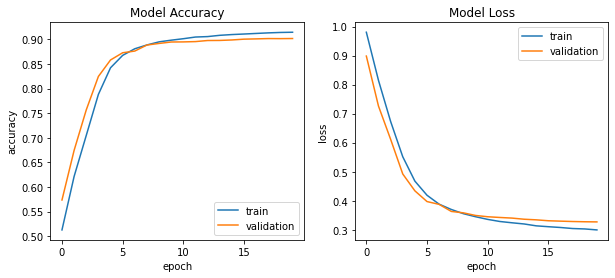

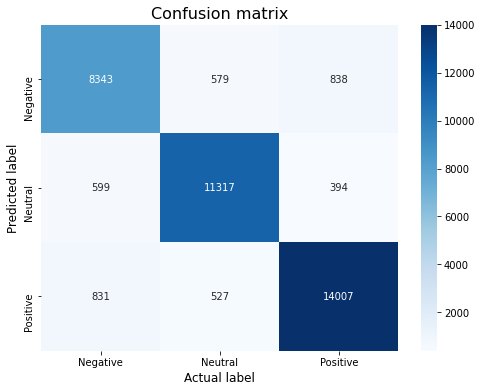

In [27]:
#plot training performance over epochs
plot_training_hist(history4)

# Evaluate model on the test set
loss, accuracy, precision, recall = model.evaluate(X_test, y_test, verbose=0)
# Print metrics
print('Performance of version 1 model')
print('Accuracy  : {:.4f}'.format(accuracy))
print('Precision : {:.4f}'.format(precision))
print('Recall    : {:.4f}'.format(recall))
print('F1 Score  : {:.4f}'.format(f1_score(precision, recall)))

#plot confusion matrix
plot_confusion_matrix(model, X_test, y_test)

# Save the model architecture & the weights
#model.save('best_model0.h5') #original
model.save('version4.h5') #my
print('Version 4 saved')

In [28]:
from keras.models import load_model

# Load model
model = load_model('version4.h5')

def predict_class(text):
    sentiment_classes = ['Negative', 'Neutral', 'Positive']
    max_len=50
    # Transforms text to a sequence of integers using a tokenizer object
    xt = tokenizer.texts_to_sequences(text)
    # Pad sequences to the same length
    xt = pad_sequences(xt, padding='post', maxlen=max_len)
    # Do the prediction using the loaded model
    yt = model.predict(xt).argmax(axis=1)
    # Print the predicted sentiments
    print('The predicted sentiment is', sentiment_classes[yt[0]])

In [29]:
predict_class(['"I hate when I have to call and wake people up'])

The predicted sentiment is Negative


In [30]:
predict_class(['The food was meh'])

The predicted sentiment is Neutral


In [31]:
predict_class(['He is a best minister india ever had seen'])

The predicted sentiment is Positive


# Conclusion

The following chart summarizes the results of the four models I built. The last model, version 4, clearly outperforms the others. All key metrics—accuracy, precision, recall, and F1 score—reach around 90%. Here are the major learnings from this problem:

- SimpleRNN without much regularization produces a very poor model: The initial model, which used SimpleRNN, performed poorly due to a lack of capacity to capture long-term dependencies and insufficient regularization.
- LSTM elevates the model performance significantly: Introducing LSTM layers made a substantial difference in processing text data like tweets, which typically have a length within 50 words.
- Bi-directional LSTM enhances the model further: Incorporating bi-directional LSTM, along with additional layers for dimensionality reduction and regularization, further improved model performance.

If I were to continue the model development, I would add multiple rounds of bi-directional LSTM layers wrapped with Conv1D and dropout layers. A more complex RNN architecture might push the model accuracy rate further into the 90+ range.


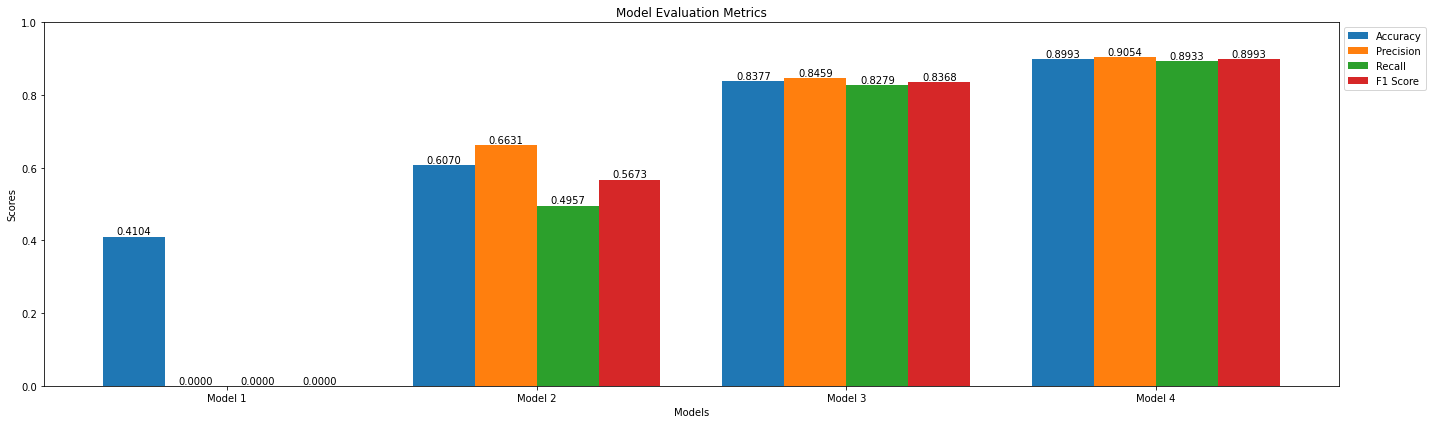

In [39]:
from keras.models import load_model
import matplotlib.pyplot as plt
import numpy as np

def evaluate_model(model, X_test, y_test):
    # Evaluate model on the test set
    loss, accuracy, precision, recall = model.evaluate(X_test, y_test, verbose=0)
    
    # Calculate F1 Score
    if precision + recall == 0:
        f1 = 0.0
    else:
        f1 = 2 * (precision * recall) / (precision + recall)    
    #f1 = 2 * (precision * recall) / (precision + recall)
    
    # Print metrics
    #print('')
    #print('Accuracy  : {:.4f}'.format(accuracy))
    #print('Precision : {:.4f}'.format(precision))
    #print('Recall    : {:.4f}'.format(recall))
    #print('F1 Score  : {:.4f}'.format(f1))
    
    return accuracy, precision, recall, f1

# Function to load models
def load_models(start, end, base_name='version'):
    models = []
    for i in range(start, end + 1):
        model = load_model(f'{base_name}{i}.h5')
        #print(f'load model {i}')
        models.append(model)
    return models

# Load models
firstmodel = 1
lastmodel = 4
models = load_models(firstmodel, lastmodel)  # Change the range as needed
model_names = [f'Model {i}' for i in range(1, lastmodel+1)]

# Store results
results = {
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1 Score': []
}

# Evaluate each model and store results
for model in models:
    accuracy, precision, recall, f1 = evaluate_model(model, X_test, y_test)
    results['Accuracy'].append(accuracy)
    results['Precision'].append(precision)
    results['Recall'].append(recall)
    results['F1 Score'].append(f1)

# Plotting
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
num_metrics = len(metrics)
bar_width = 0.2
index = np.arange(len(models))

fig, ax = plt.subplots(figsize=(20, 6))  # Adjust the width to make it twice as wide

# Create bars for each metric
for i, metric in enumerate(metrics):
    bar_positions = index + i * bar_width
    bars = ax.bar(bar_positions, results[metric], bar_width, label=metric)
    
    # Add y-values on each bar
    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2.0, yval, f'{yval:.4f}', ha='center', va='bottom')

# Set the labels and title
ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Model Evaluation Metrics')
ax.set_xticks(index + bar_width * (num_metrics / 2 - 0.5))
ax.set_xticklabels(model_names)
ax.set_ylim(0, 1)  # Set y-axis scale from 0.6 to 1
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))  # Place legend outside the plot area

# Show the plot
plt.tight_layout()
plt.show()
